In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('data/StudentsPerformance.csv')

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape

(1000, 8)

### 3. Data Checks to perform
#### i) check missng values
#### ii) check duplicates
#### iii) check data types
#### iv) check the number of unique values of each column
#### v) check statistics of data set
#### vi) check various categories present in the different categorical column


In [5]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [8]:
col = df.columns    

In [9]:
# def check(df):
#     for i in col:
#         df.
#         # print()

In [10]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [11]:
def check(df):
    for i in col:
        print(i)
        print(df[i].unique())

In [12]:
check(df)

gender
['female' 'male']
race/ethnicity
['group B' 'group C' 'group A' 'group D' 'group E']
parental level of education
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
lunch
['standard' 'free/reduced']
test preparation course
['none' 'completed']
math score
[ 72  69  90  47  76  71  88  40  64  38  58  65  78  50  18  46  54  66
  44  74  73  67  70  62  63  56  97  81  75  57  55  53  59  82  77  33
  52   0  79  39  45  60  61  41  49  30  80  42  27  43  68  85  98  87
  51  99  84  91  83  89  22 100  96  94  48  35  34  86  92  37  28  24
  26  95  36  29  32  93  19  23   8]
reading score
[ 72  90  95  57  78  83  43  64  60  54  52  81  53  75  89  32  42  58
  69  73  71  74  70  65  87  56  61  84  55  44  41  85  59  17  39  80
  37  63  51  49  26  68  45  47  86  34  79  66  67  91 100  76  77  82
  92  93  62  88  50  28  48  46  23  38  94  97  99  31  96  24  29  40]
writing score
[ 74  88  93  44  75  78  92 

gender
['female' 'male']

race/ethnicity
['group B' 'group C' 'group A' 'group D' 'group E']

parental level of education
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']

lunch
['standard' 'free/reduced']

test preparation course
['none' 'completed']

In [13]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [14]:
num_feat = [ft for ft in col if df[ft].dtype != 'O']
cat_feat = [ft for ft in col if df[ft].dtype == 'O']

In [15]:
print("Numerical" , num_feat)
print("Categorical" , cat_feat)

Numerical ['math score', 'reading score', 'writing score']
Categorical ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


3.8 Adding columns for TOTAL SCORE and AVERAGE

In [16]:
df['total score'] = df['math score']+df['reading score'] + df['writing score']
df['average'] = df['total score']/3

In [17]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [18]:
reading_full = df[df['reading score']==100]['average'].count()
writing_full = df[df['writing score']==100]['average'].count()
math_full = df[df['math score']==100]['average'].count()

print(f'Number  of students with full marks in Maths : {math_full}')
print(f'Number of students with full marks in writing: {writing_full}')
print(f'Number of students with full marks in Read : {reading_full}')

Number  of students with full marks in Maths : 7
Number of students with full marks in writing: 14
Number of students with full marks in Read : 17


In [19]:
read_less_20 = df[df['reading score']<=20]['average'].count()
write_less_20 = df[df['writing score']<=20]['average'].count()
math_less_20 = df[df["math score"]<=20]['average'].count()

print(f'Number  of students having less than 20 marks in Maths : {math_less_20}')
print(f'Number of students having less than 20 marks in writing: {write_less_20}')
print(f'Number of students having less than 20 marks in Read : {read_less_20}')

Number  of students having less than 20 marks in Maths : 4
Number of students having less than 20 marks in writing: 3
Number of students having less than 20 marks in Read : 1


4.Exploring Data(Visualization)

4.1 Visualize average score distribution to make some conclusion



##### i)Histogram 
##### ii)Kernel Distribution function

4.1.1 Histogram and KDE

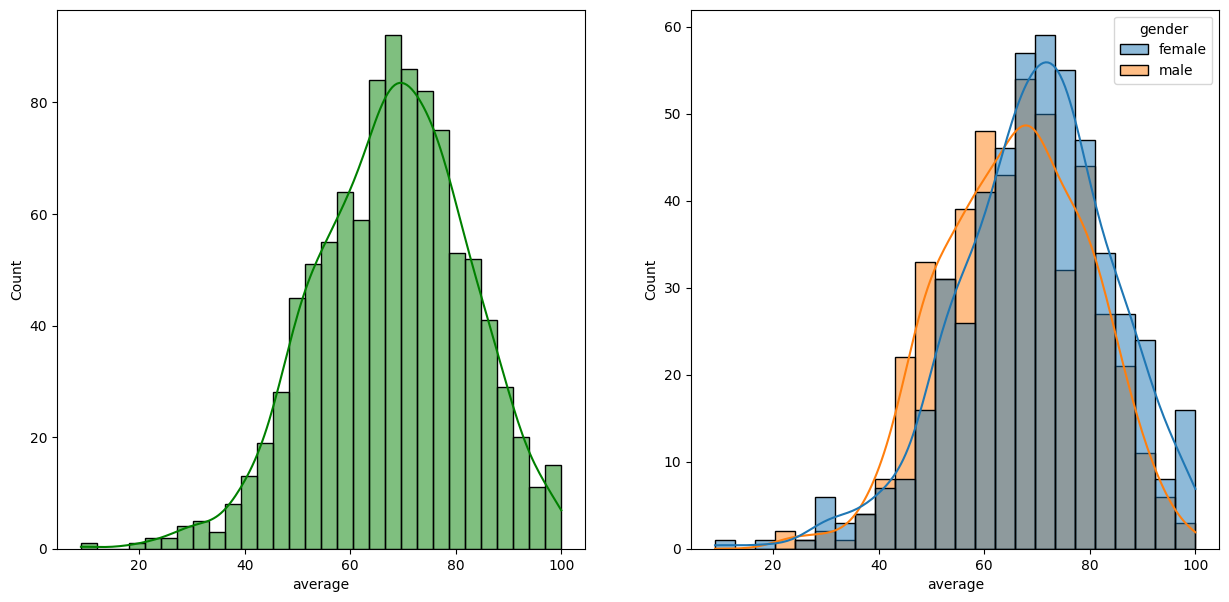

In [20]:
fig,axs = plt.subplots(1,2,figsize=(15,7))
plt.subplot(121) #1x2-->activates first subplot
sns.histplot(data = df,x='average',bins=30,kde = True,color = 'g')
plt.subplot(122)#1x2-->activates second subplot
sns.histplot(data = df,x='average',kde = True,hue='gender')
plt.show()

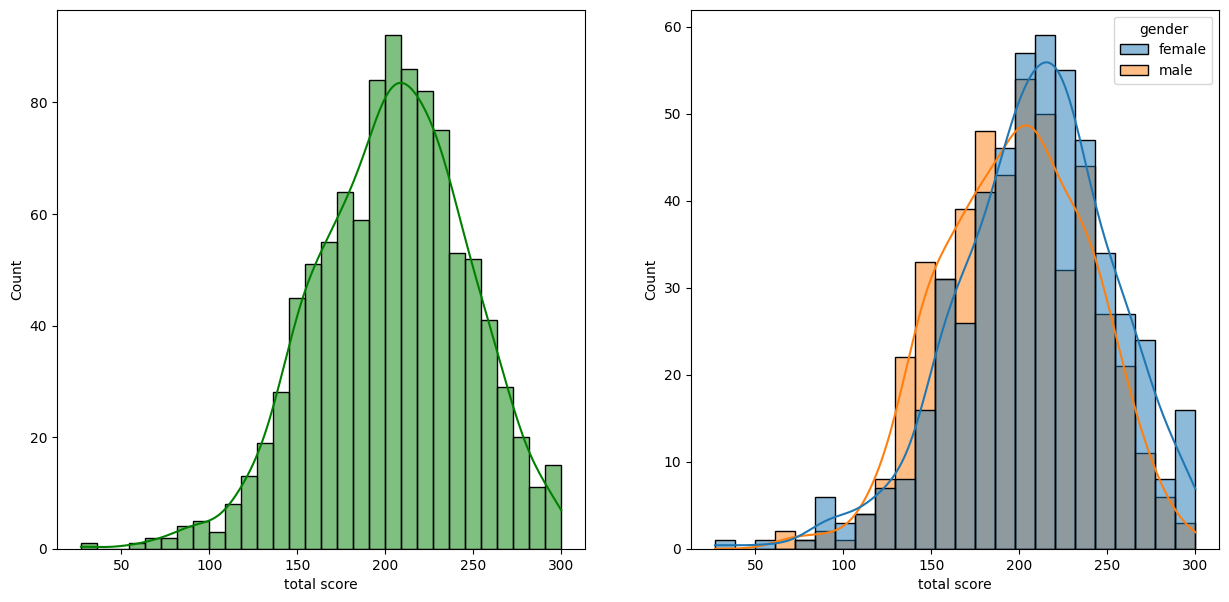

In [21]:
fig,axs = plt.subplots(1,2,figsize=(15,7))
plt.subplot(121) #1x2-->activates first subplot
sns.histplot(data = df,x='total score',bins=30,kde = True,color = 'g')
plt.subplot(122)#1x2-->activates second subplot
sns.histplot(data = df,x='total score',kde = True,hue='gender')
plt.show()

female students are tend todo beteer in examinstaions


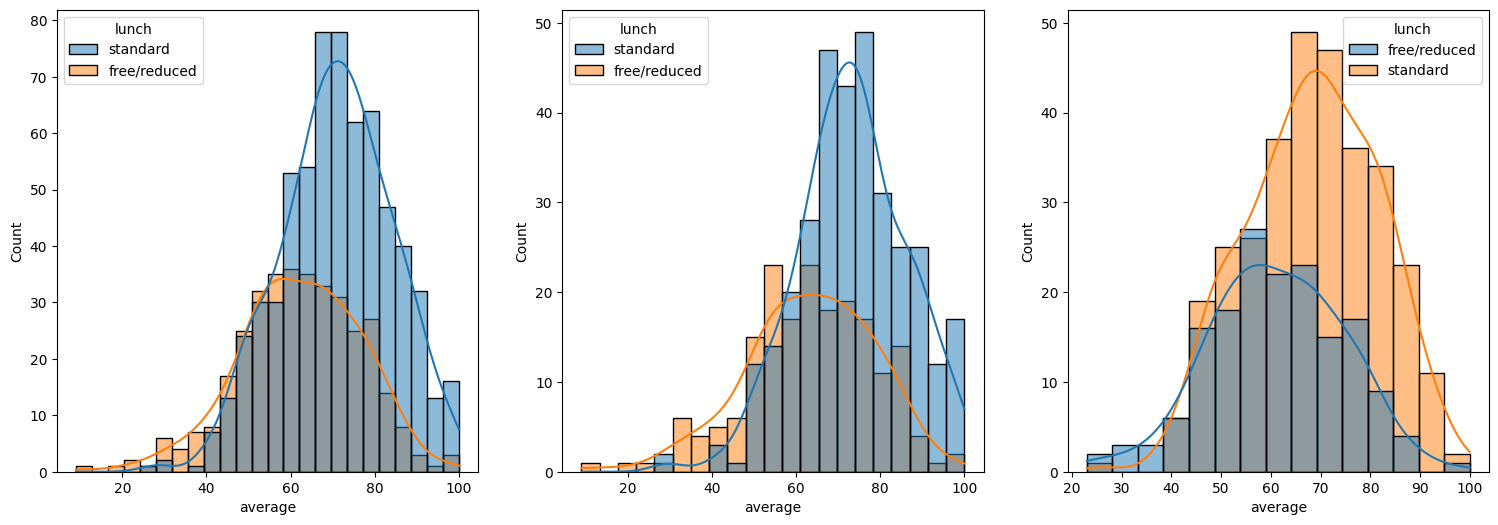

In [22]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data = df, x = 'average',kde = True,hue='lunch')
plt.subplot(142)
sns.histplot(data = df[df.gender=='female'],x='average',kde=True,hue = 'lunch')
plt.subplot(143)
sns.histplot(data = df[df.gender=='male'],x='average',kde = True,hue ='lunch')
plt.show()

##### i) standard lunch helps perform well in exams

##### ii) standard lunch helps to do well in exams ,of either ale or female

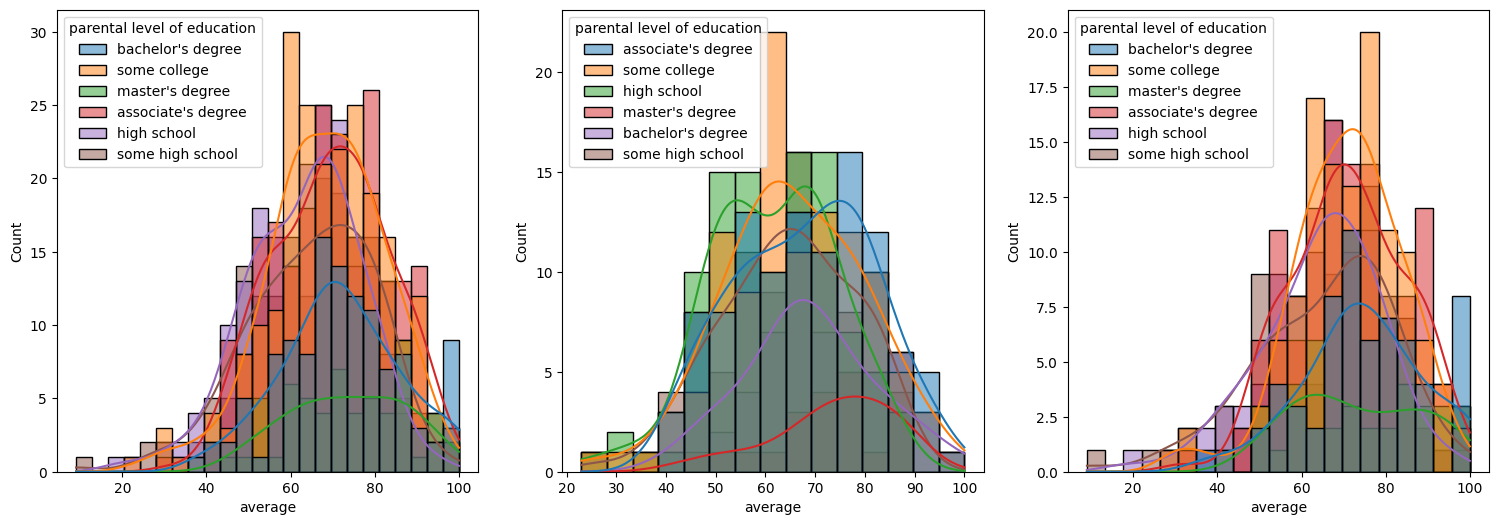

In [23]:
plt.subplots(1,3,figsize = (25,6))
plt.subplot(141)
sns.histplot(data = df,x='average',kde = True,hue ='parental level of education')
plt.subplot(142)
sns.histplot(data = df[df.gender=='male'],x = 'average',kde =True,hue = 'parental level of education')
plt.subplot(143)
sns.histplot(data = df[df.gender=='female'],x = 'average',kde = True,hue = 'parental level of education')
plt.show()

no major effect of parentaleduction can be seen on students > score

In [24]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [25]:
df['race/ethnicity'].value_counts()

race/ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

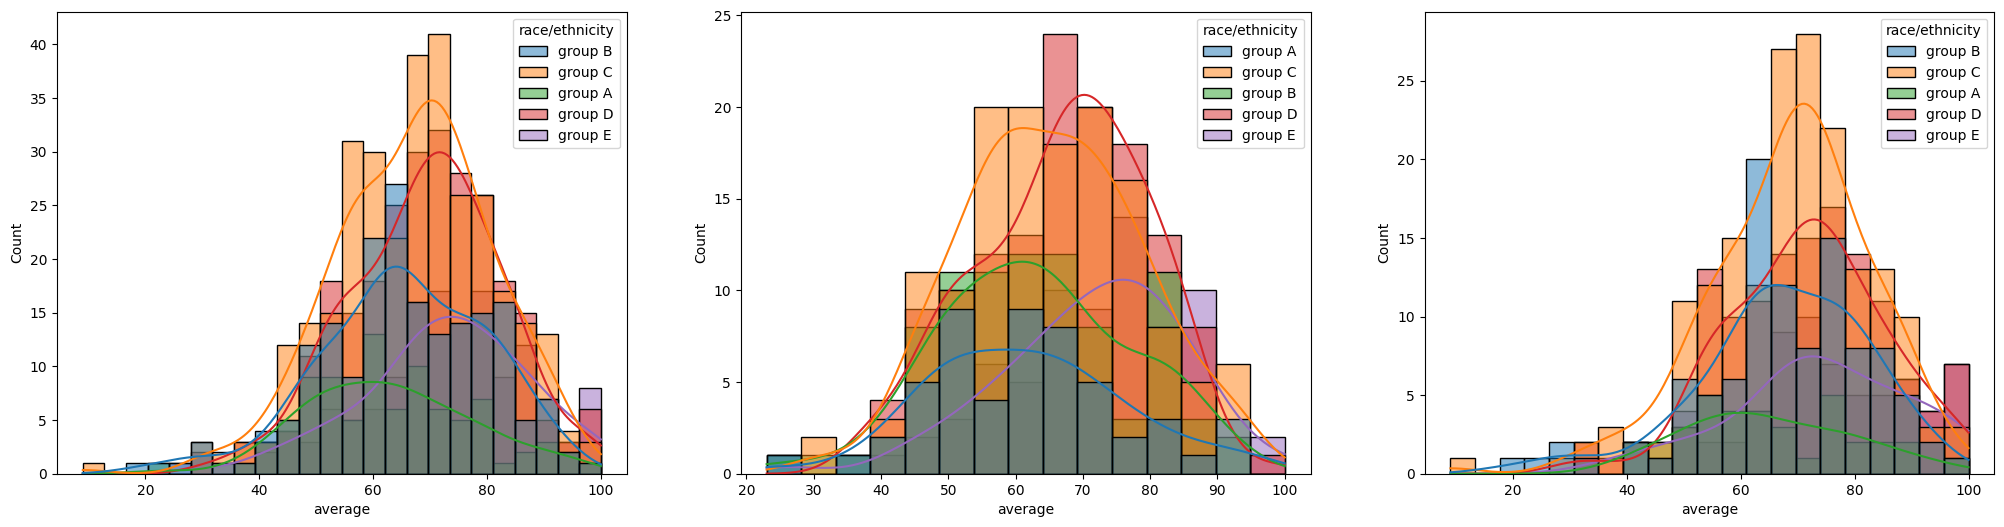

In [26]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
ax =sns.histplot(data=df,x='average',kde=True,hue='race/ethnicity')
plt.subplot(132)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race/ethnicity')
plt.subplot(133)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race/ethnicity')
plt.show()

##### 4.2 Maximum score plot of students in all three subjects

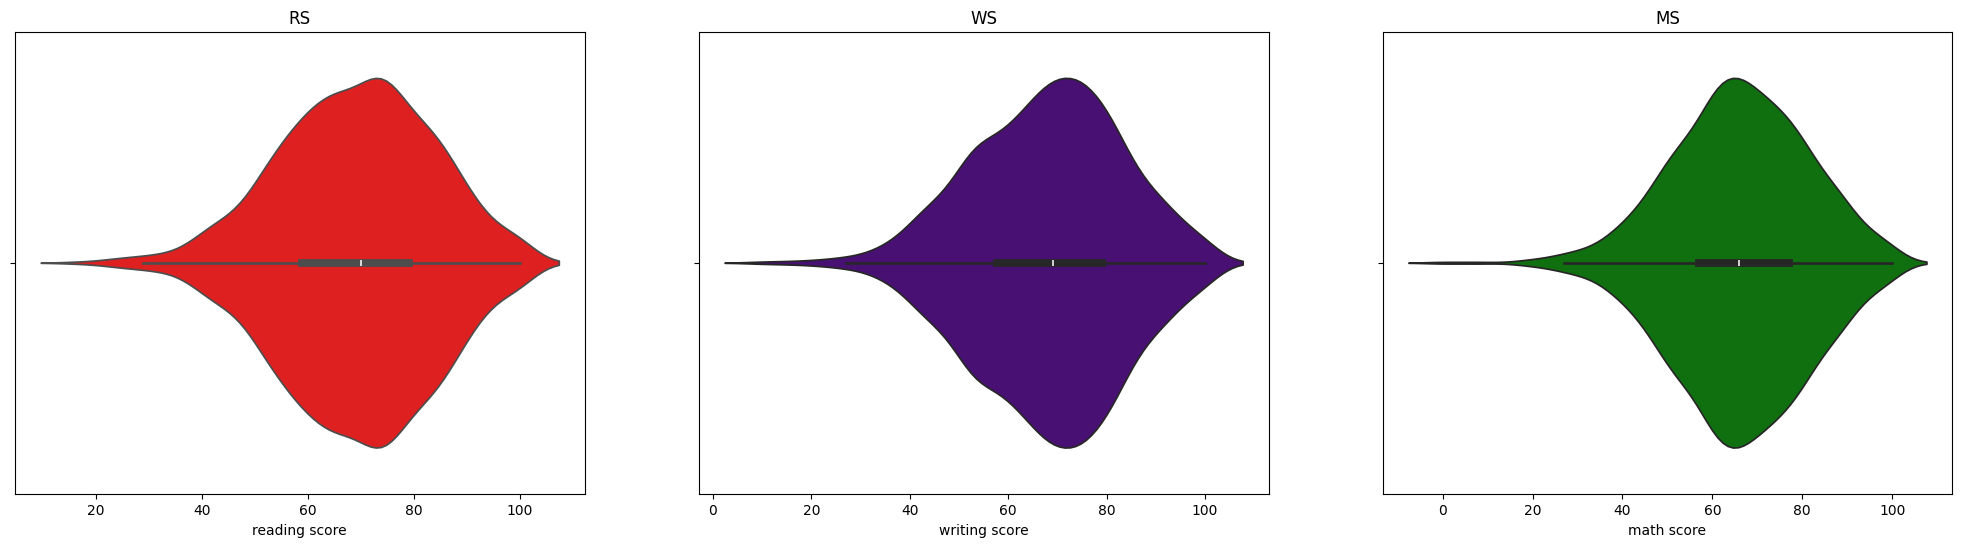

In [27]:
plt.subplots(1,3,figsize = (25,6))
plt.subplot(131)
plt.title('RS')
sns.violinplot(data = df,x='reading score',color = 'red')
plt.subplot(132)
plt.title('WS')
sns.violinplot(data = df,x='writing score',color = 'indigo')
plt.subplot(133)
plt.title('MS')
sns.violinplot(data = df,x='math score',color = 'green')
plt.show()

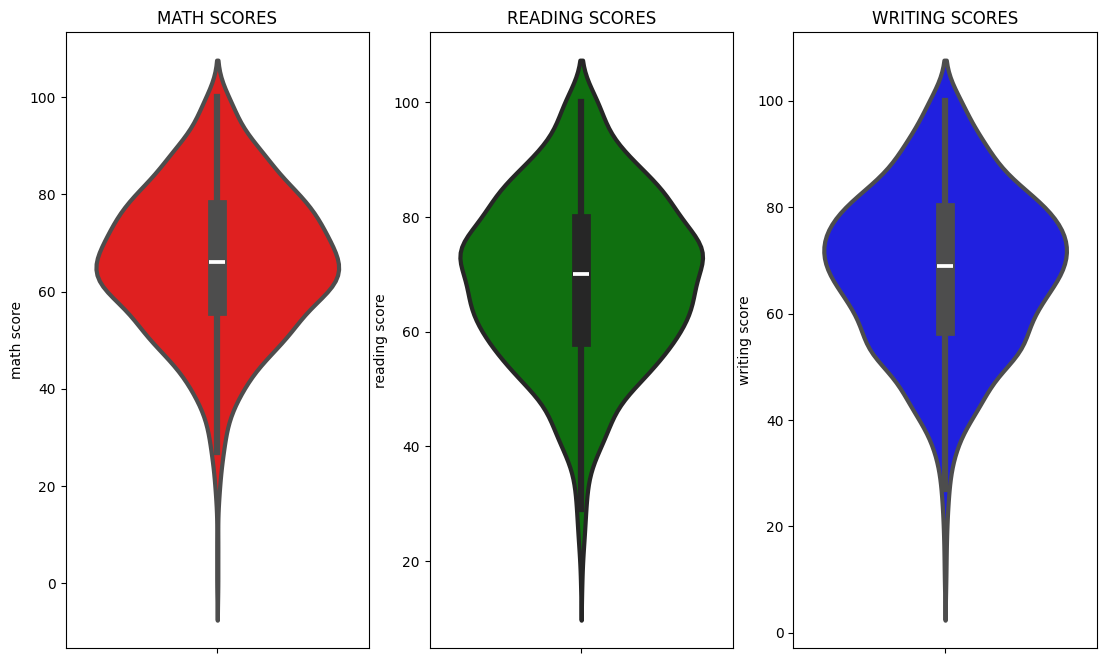

In [28]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing score',data=df,color='blue',linewidth=3)
plt.show()

the scores maximum obatined by students in all the three subjects ranges between 60-80

##### 4.3 Multivariate analysis using pieplot

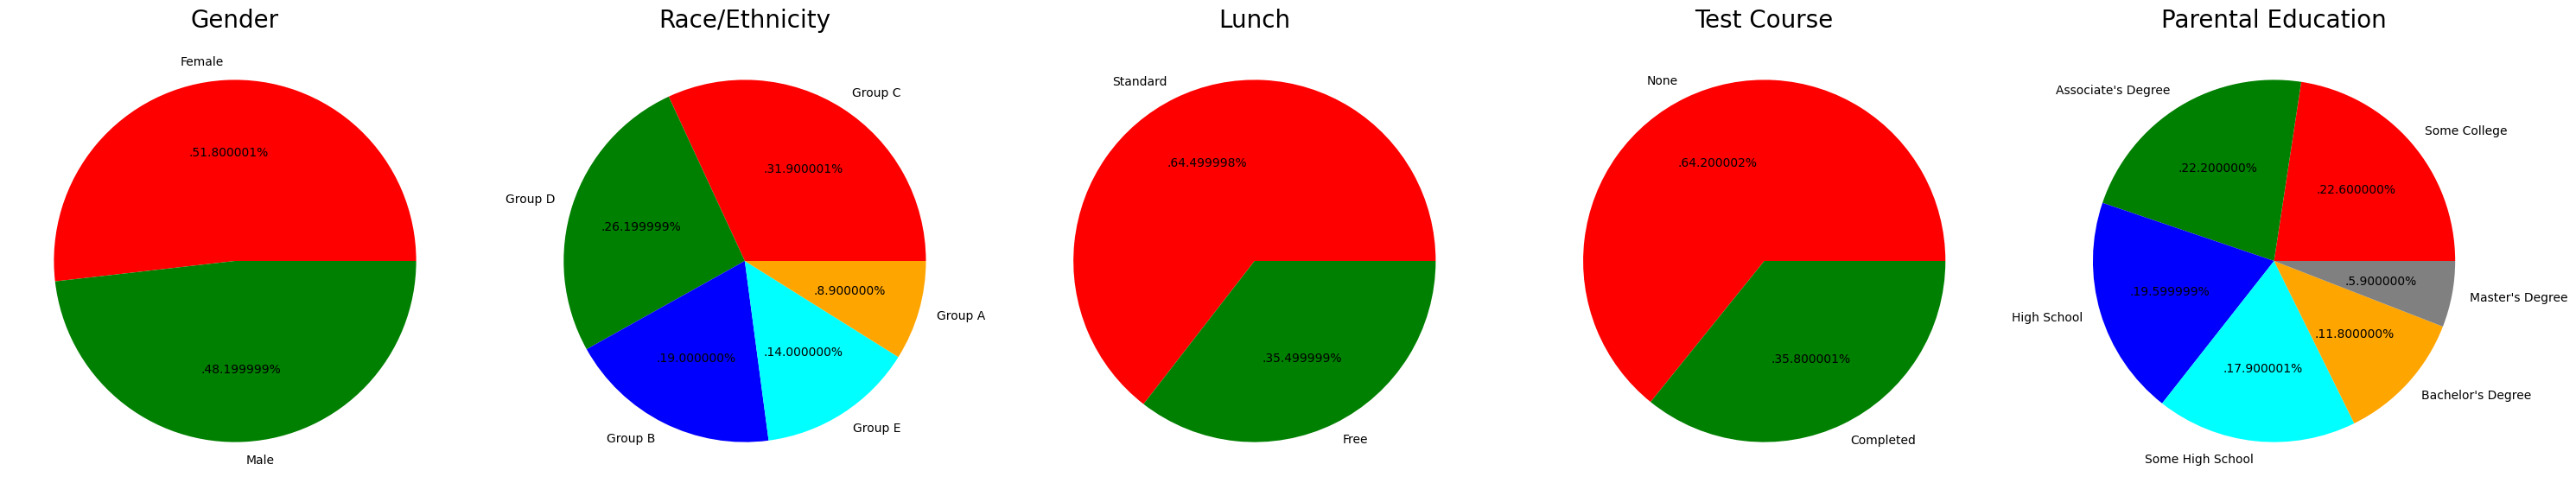

In [29]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race/ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test preparation course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental level of education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

#### 4.4 Feature wise Visualisation 
##### 4.41 GENDER COLUMN
i) How is distribution of Gender
ii) Is gender has any impact on students performance
##### UNIVARIATE ANALYSIS

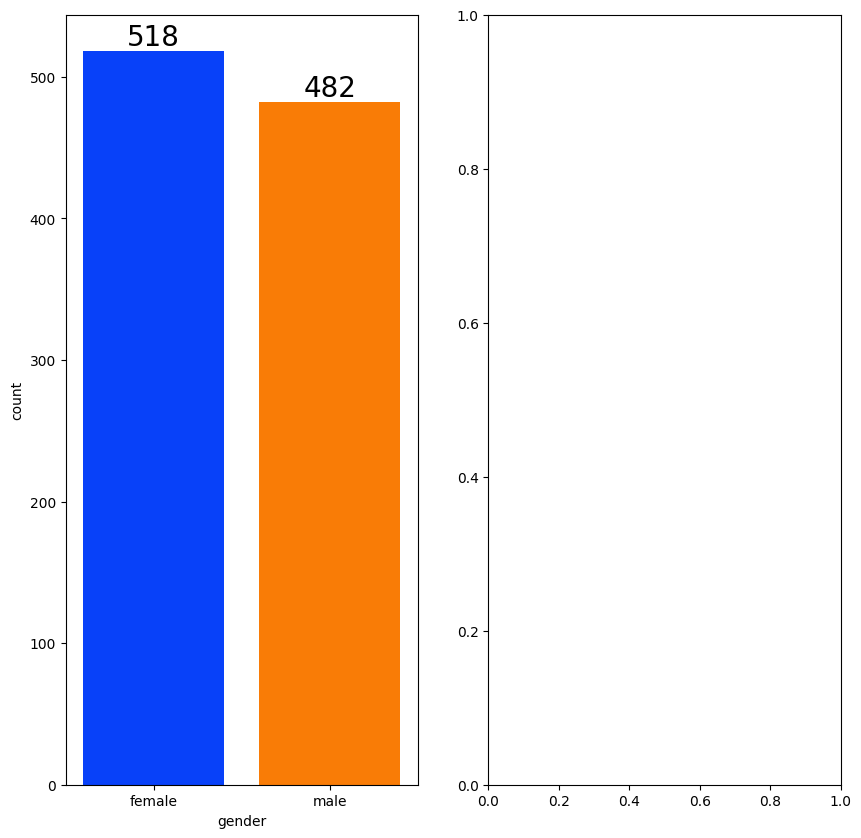

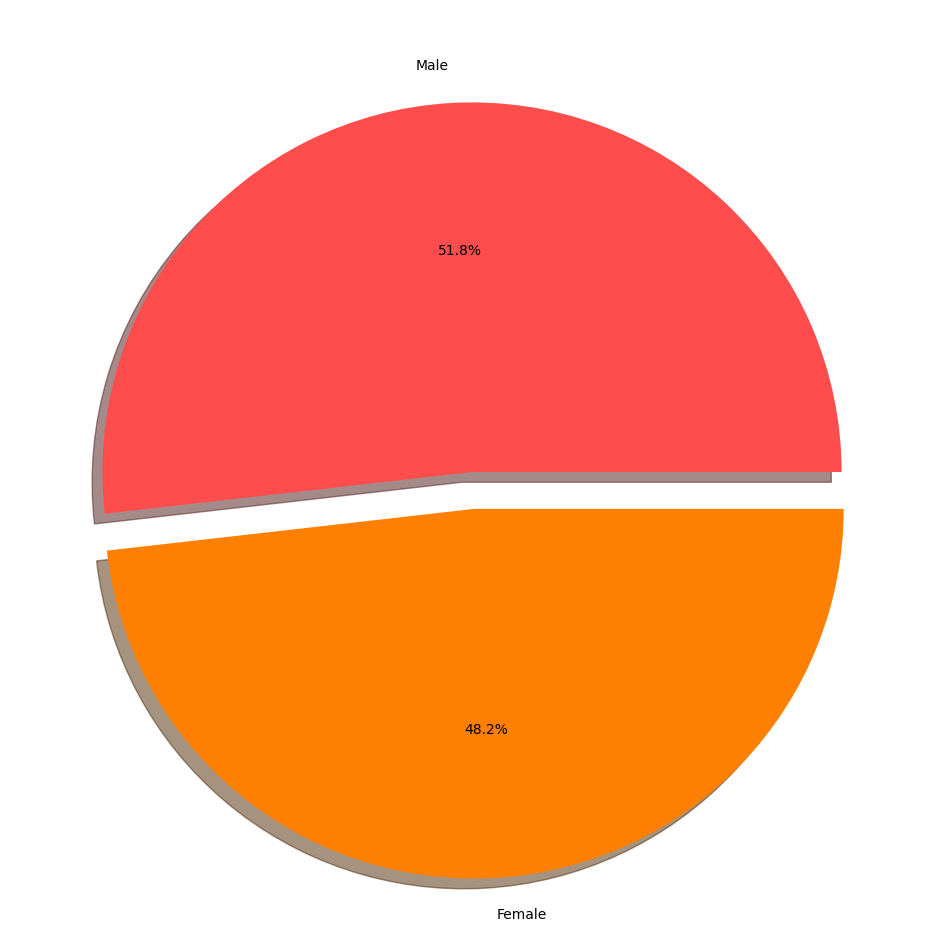

In [30]:
f,ax = plt.subplots(1,2,figsize=(10,10))
sns.countplot(x=df['gender'],data = df, palette = 'bright',ax=ax[0],saturation =0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size =20)
# explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()
plt.pie(x = df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct = '%1.1f%%',shadow=True,colors = ['#ff4d4d','#ff8000'])
plt.show()

In [31]:
nums = df.select_dtypes(include ='number')
nums = df[['gender']].join(nums)
gender_group = nums.groupby('gender').mean()
gender_group

,math score,reading score,writing score,total score,average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


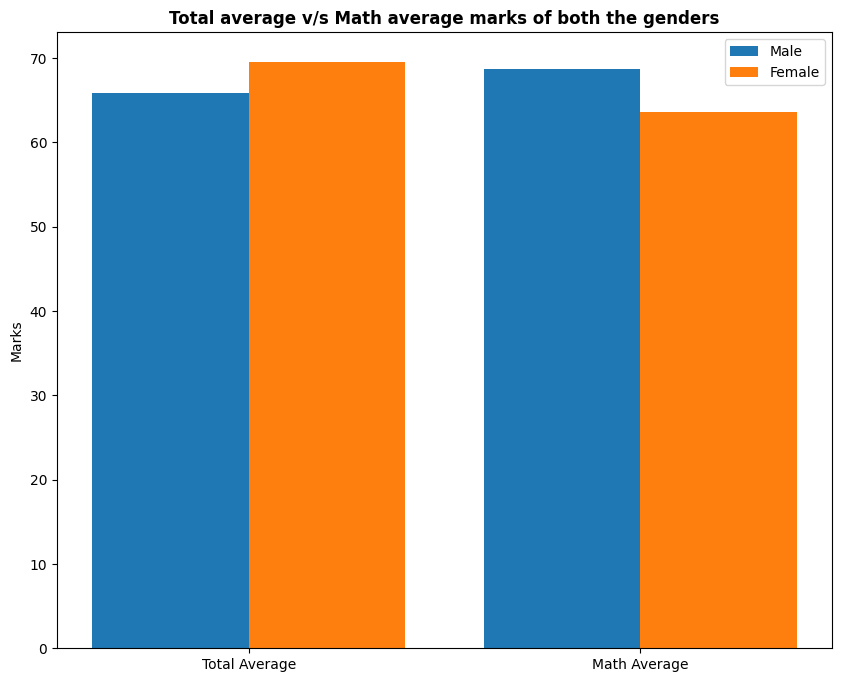

In [32]:
plt.figure(figsize=(10,8))

X = ['Total Average','Math Average']

female_scores = [gender_group['average'][0], gender_group['math score'][0]]
male_scores = [gender_group['average'][1], gender_group['math score'][1]]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2,male_scores,0.4,label = 'Male')
plt.bar(X_axis+0.2,female_scores,0.4,label='Female')

plt.xticks(X_axis,X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()


On the average females have better overall score than males
Whereas males have scored Higher in maths

#### 4.4.2 RACE/ETHINICITY COLUMN 
##### UNIVARIATE ANALYSIS

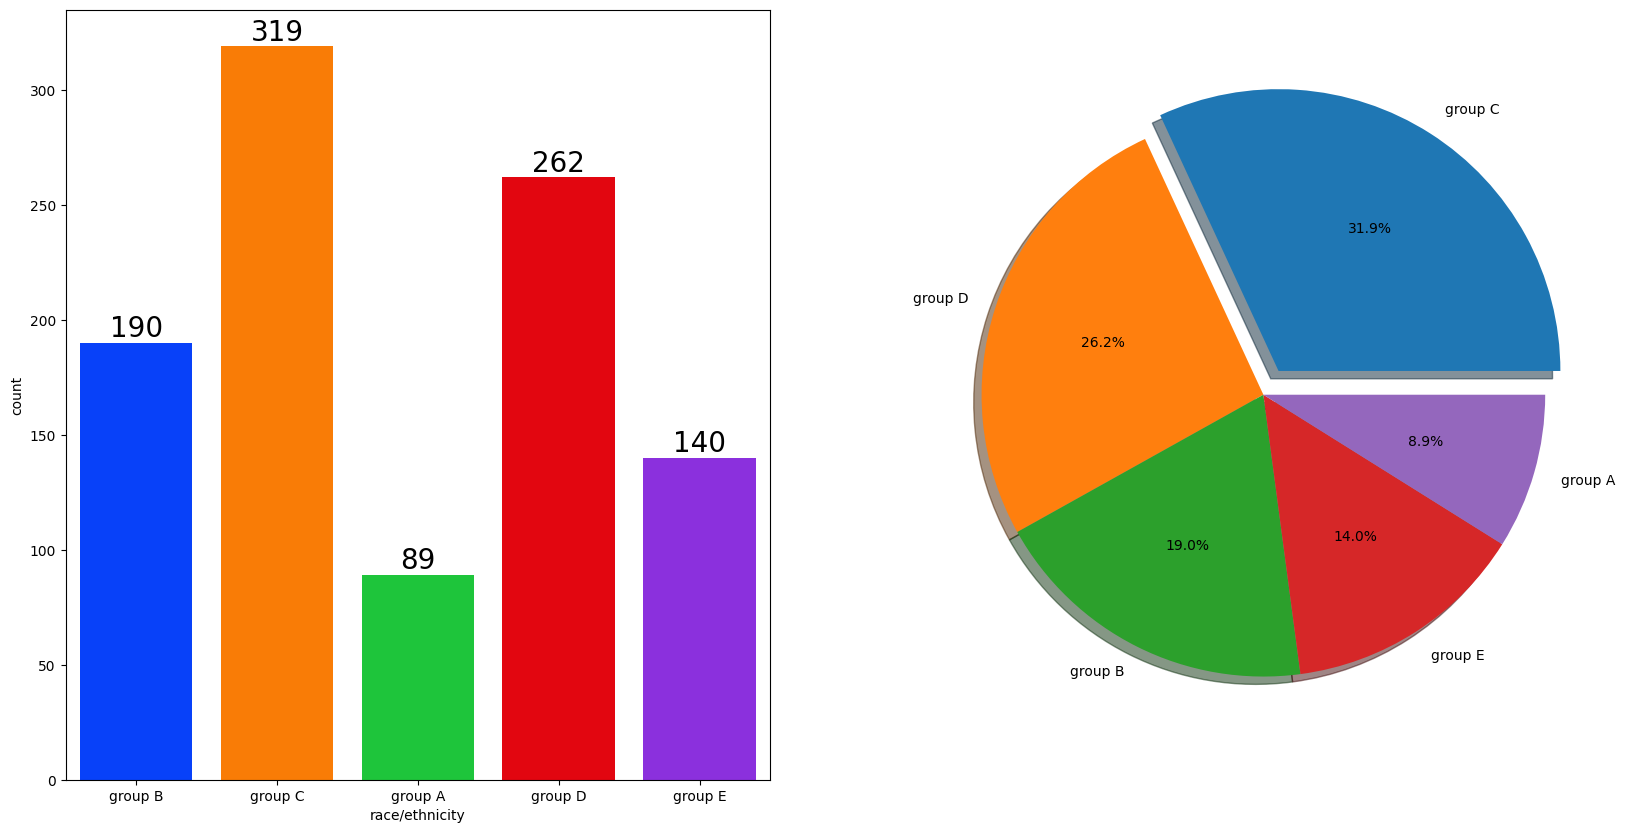

In [33]:
f,ax = plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race/ethnicity'],data = df,palette='bright',ax = ax[0],saturation = 0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size = 20)

plt.pie(x = df['race/ethnicity'].value_counts(),labels = df['race/ethnicity'].value_counts().index,explode = [0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()


Most of the students belong to group C/D
Lesser students belong to group A

##### BIVARIATE ANALYSIS

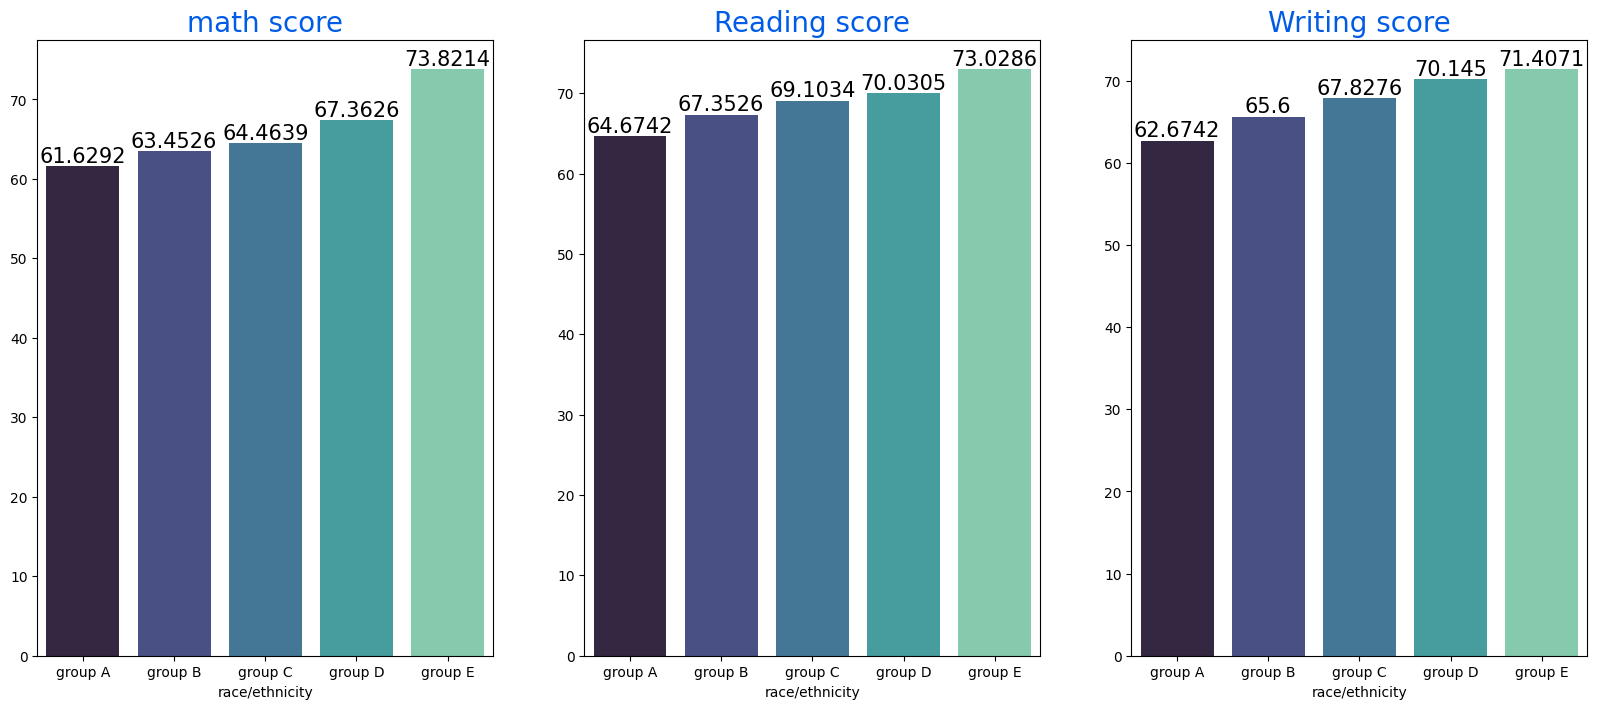

In [34]:
grp_data2 = df.groupby('race/ethnicity')
f,ax = plt.subplots(1,3,figsize=(20,8))

sns.barplot(x = grp_data2['math score'].mean().index,y=grp_data2['math score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('math score',color='#005ce6',size = 20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size = 15)

sns.barplot(x = grp_data2['reading score'].mean().index,y=grp_data2['reading score'].mean().values,palette = 'mako',ax =ax[1])
ax[1].set_title('Reading score',color='#005ce6',size = 20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size = 15)

sns.barplot(x = grp_data2['writing score'].mean().index,y=grp_data2['writing score'].mean().values,palette = 'mako',ax =ax[2])
ax[2].set_title('Writing score',color='#005ce6',size = 20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size = 15)


Math score : group e= highest, group a = lowest

reathig score : group e= highest, group a = lowest

writing score : group e= highest, group a = lowest\

Students from a lower Socioeconomic status have a lower avg in all course subjects

#### 4.4.3 PARENTAL LEVEL OF EDUCATION COLUMN 
##### UNIVARIATE ANALYSIS

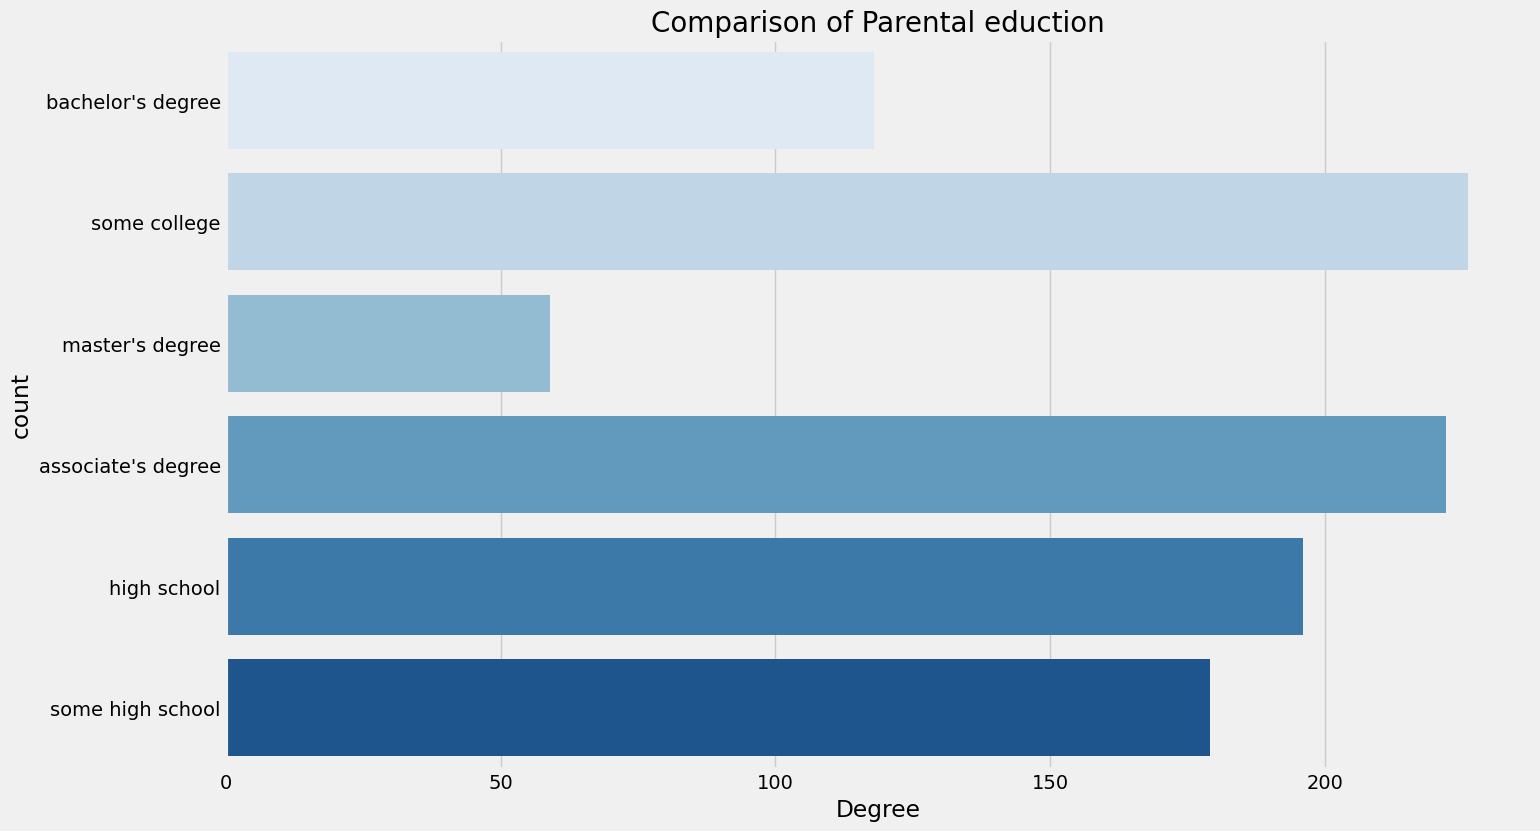

In [35]:
plt.rcParams['figure.figsize'] = (15,9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental level of education'],palette='Blues')
plt.title('Comparison of Parental eduction', fontweight = 30,fontsize =20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

BIVARIATE ANALYSIS ( Is parental education has any impact on student's performance ? )

In [36]:
nums = df.select_dtypes(include ='number')
nums = df[['gender']].join(nums)
gender_group = nums.groupby('gender').mean()
gender_group

,math score,reading score,writing score,total score,average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


In [37]:
grp_data1 = df.select_dtypes(include = 'number')
grp_data1 = df[['parental level of education']].join(grp_data1)
ptt = grp_data1.groupby('parental level of education').mean()
ptt

,math score,reading score,writing score,total score,average
parental level of education,,,,,
associate's degree,67.882883,70.927928,69.896396,208.707207,69.569069
bachelor's degree,69.389831,73.000000,73.381356,215.771186,71.923729
high school,62.137755,64.704082,62.448980,189.290816,63.096939
master's degree,69.745763,75.372881,75.677966,220.796610,73.598870
some college,67.128319,69.460177,68.840708,205.429204,68.476401
some high school,63.497207,66.938547,64.888268,195.324022,65.108007


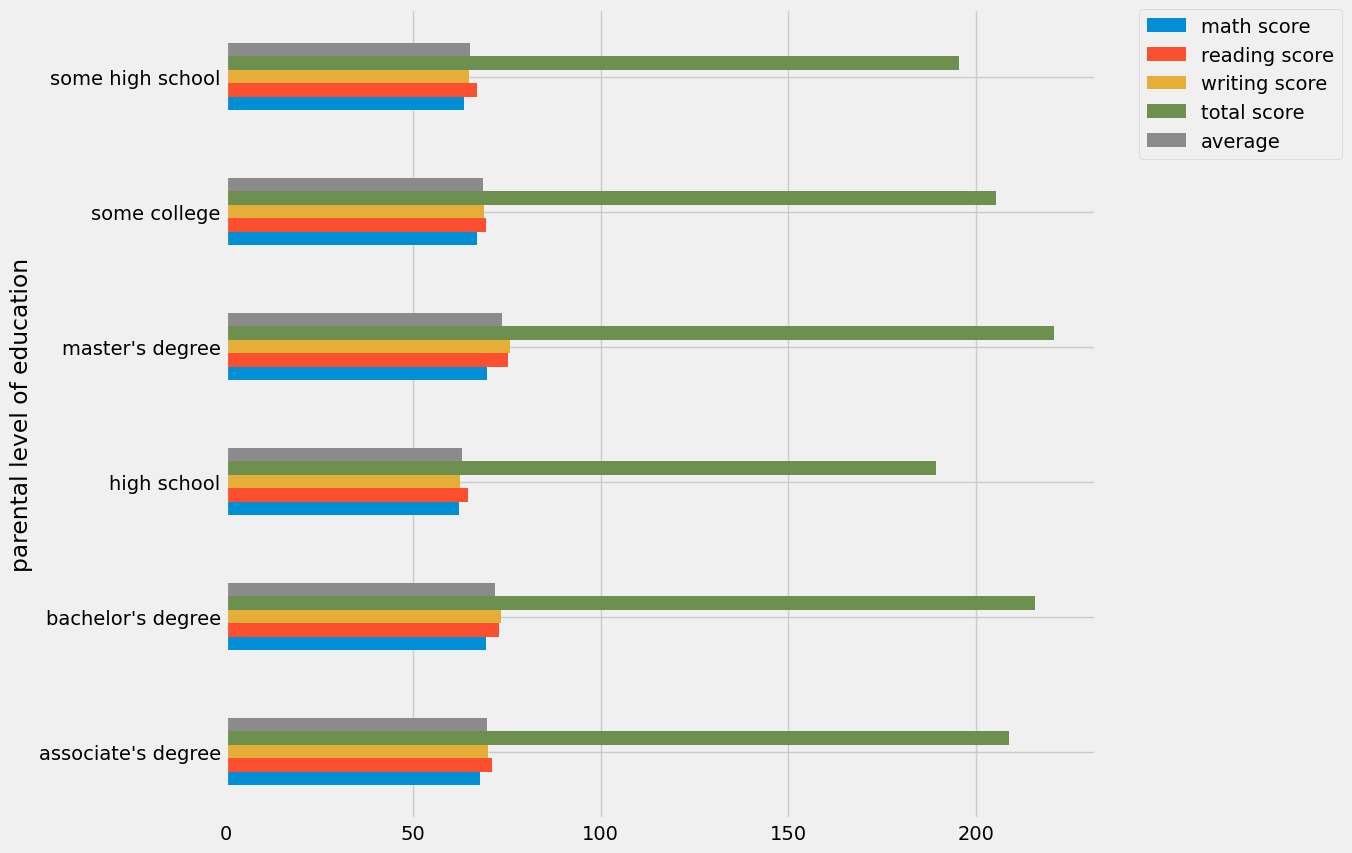

In [38]:
ptt.plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

#### 4.4.4 LUNCH COLUMN 
##### UNIVARIATE ANALYSIS

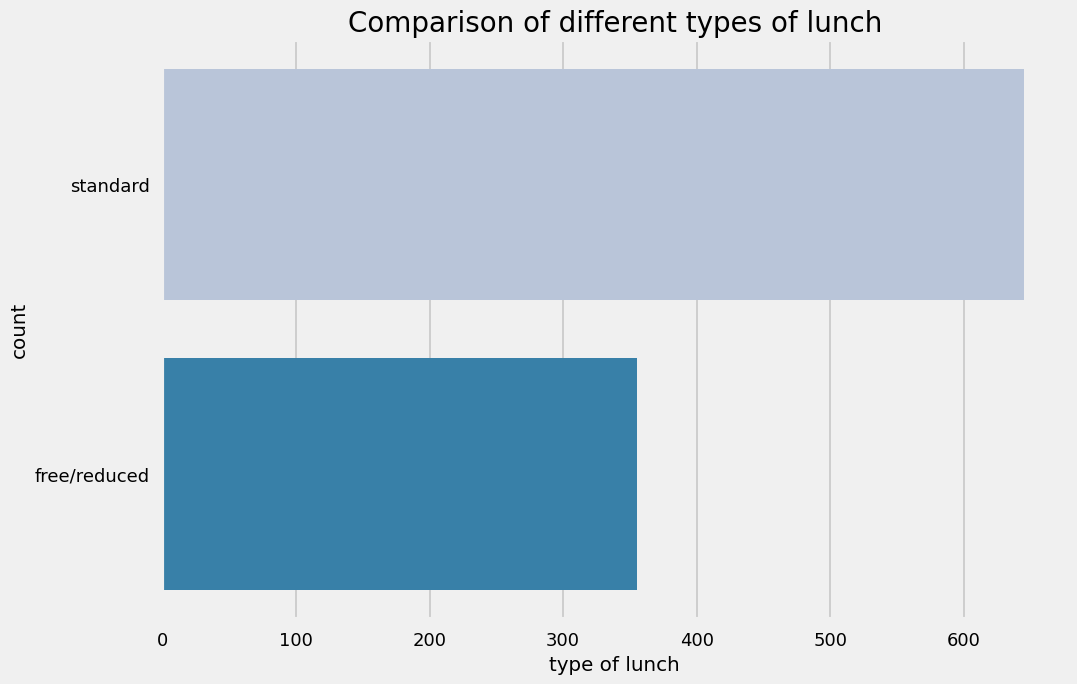

In [39]:
plt.rcParams['figure.figsize'] = (15,9)
plt.style.use('seaborn-talk')
sns.countplot(df['lunch'],palette = 'PuBu')
plt.title('Comparison of different types of lunch',fontweight = 30,fontsize=20)
plt.xlabel('type of lunch')
plt.ylabel('count')
plt.show()

BIVARIATE ANALYSIS ( Is lunch type intake has any impact on student's performance ? )

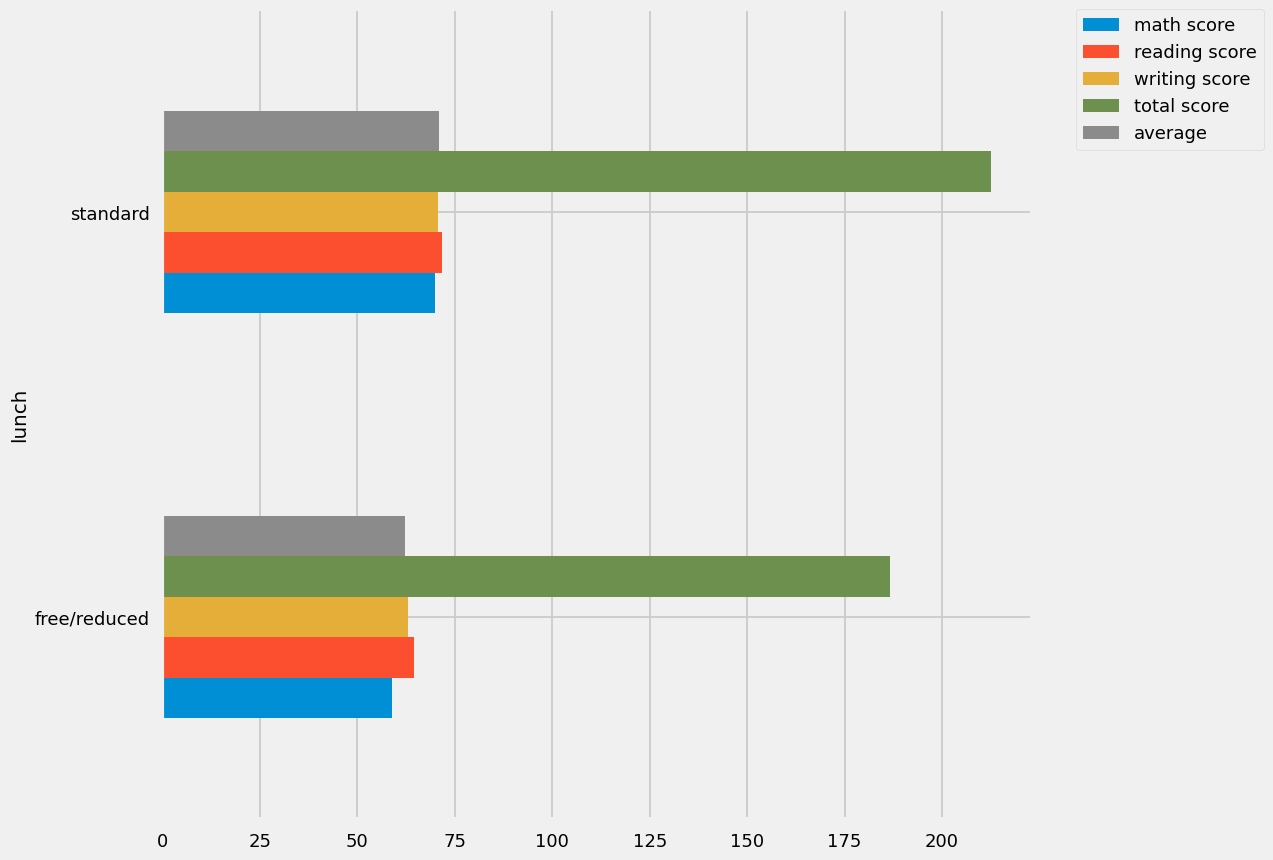

In [40]:
dff = df.select_dtypes('number')
dff = dff.join(df['lunch'])
data_dff = dff.groupby('lunch').mean()
data_dff.plot(kind = 'barh',figsize=(10,10))
plt.legend(bbox_to_anchor = (1.05,1),loc =2,borderaxespad=0.)
plt.show()

Students with standarad lunch have better total n average score than free/reduced 

##### 4.4.5 TEST PREPARATION COURSE COLUMN
##### BIVARIATE ANALYSIS ( Is Test prepration course has any impact on student's performance ? )

<Axes: xlabel='lunch', ylabel='writing score'>

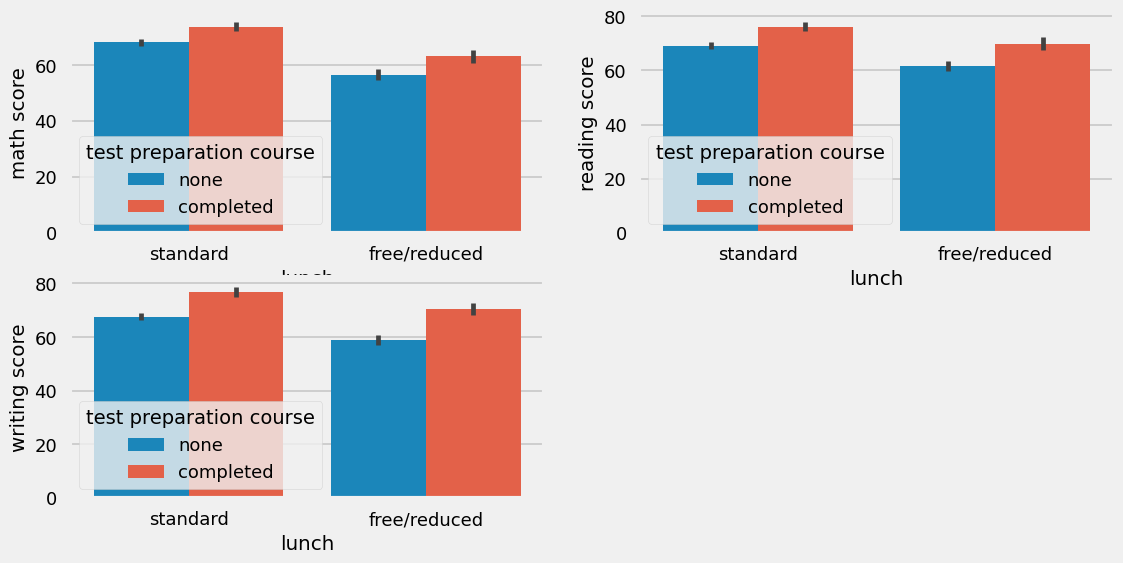

In [41]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot(x=df['lunch'], y=df['math score'],hue =df['test preparation course'])
plt.subplot(2,2,2)
sns.barplot(x=df['lunch'], y=df['reading score'],hue =df['test preparation course'])
plt.subplot(2,2,3)
sns.barplot(x=df['lunch'], y=df['writing score'],hue =df['test preparation course'])


Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course

##### 4.4.6 CHECKING OUTLIERS

<Axes: ylabel='average'>

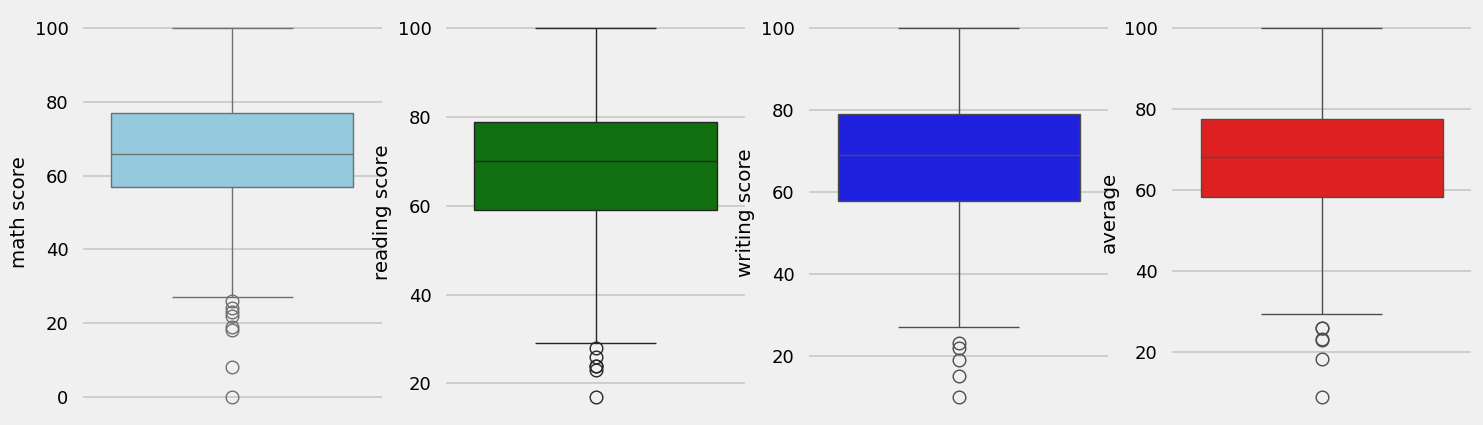

In [42]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(1,4,1)
sns.boxplot(df['math score'],color = 'skyblue')
plt.subplot(1,4,2)
sns.boxplot(df['reading score'],color = 'green')
plt.subplot(1,4,3)
sns.boxplot(df['writing score'],color = 'blue')
plt.subplot(1,4,4)
sns.boxplot(df['average'],color = 'red')

##### 4.4.7 MUTIVARIATE ANALYSIS USING PAIRPLOT

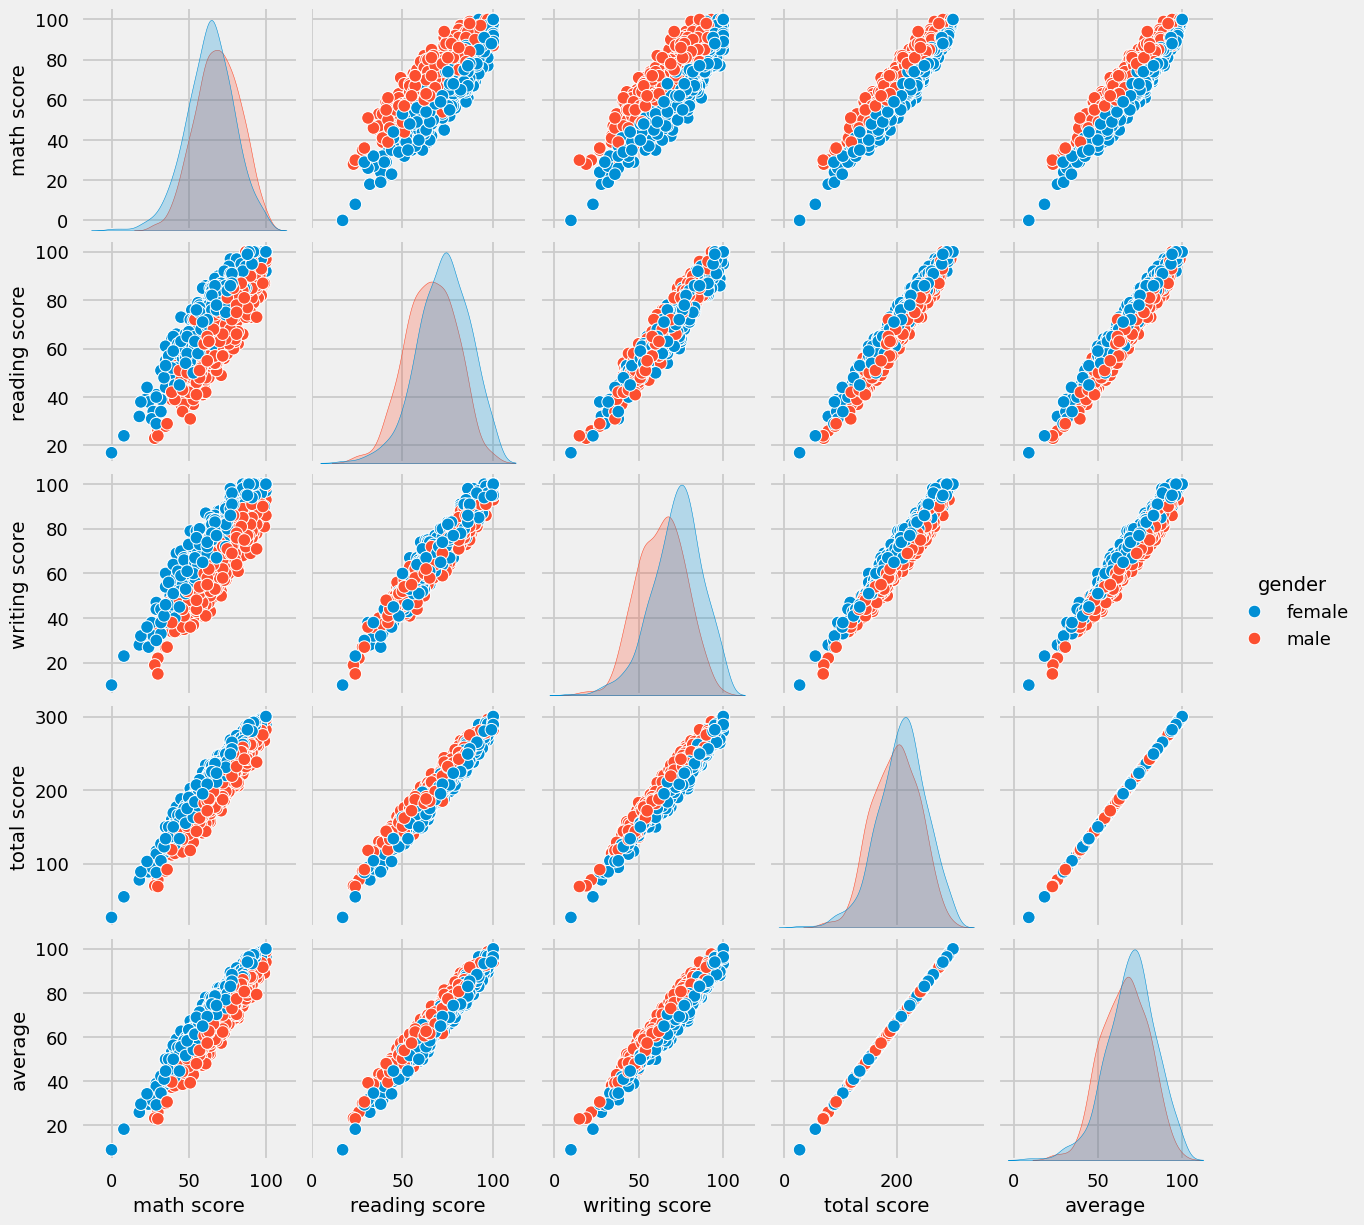

In [43]:
sns.pairplot(df,hue='gender')
plt.show()

### 5. Conclusions
###### Student's Performance is related with lunch, race, parental level education
###### Females lead in pass percentage and also are top-scorers
###### Student's Performance is not much related with test preparation course
###### Finishing preparation course is benefitial.